In [1]:
import sys, os
import pandas as pd
import numpy as np

In [2]:
val_log = '/scratch/work/huangg5/muse/MuSe-2023/logs/val_performance.csv'
df = pd.read_csv(val_log)
print(df.shape)
print(df.columns)

(299, 6)
Index(['Seed', 'Metric', 'Value', 'feature', 'task', 'output'], dtype='object')


In [3]:
dict_metric = {'mimic': 'Mean Pearsons',
               'humor': 'AUC',
               'personalisation': 'CCC'}

In [9]:
for _item in set(df.output.values.tolist()):
    print(_item)

resp
ECG
valence
nan
BPM
physio-arousal


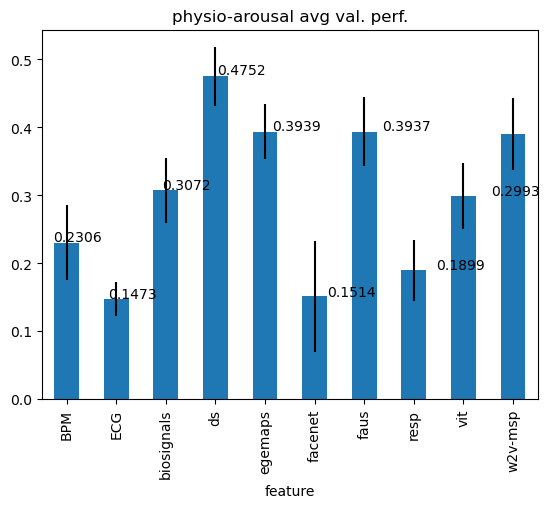

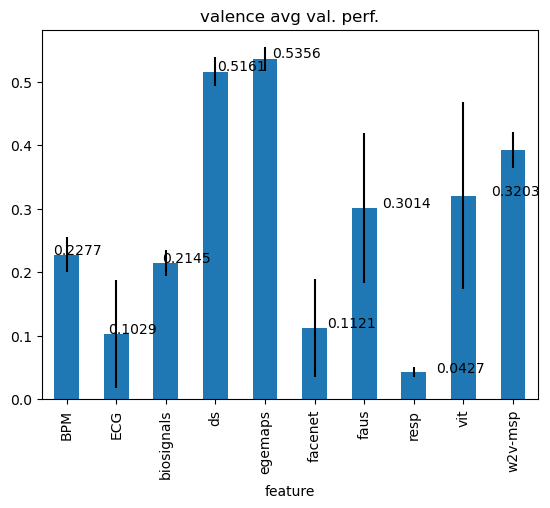

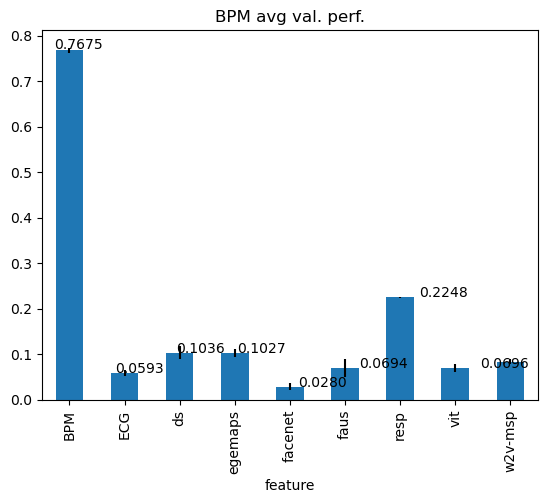

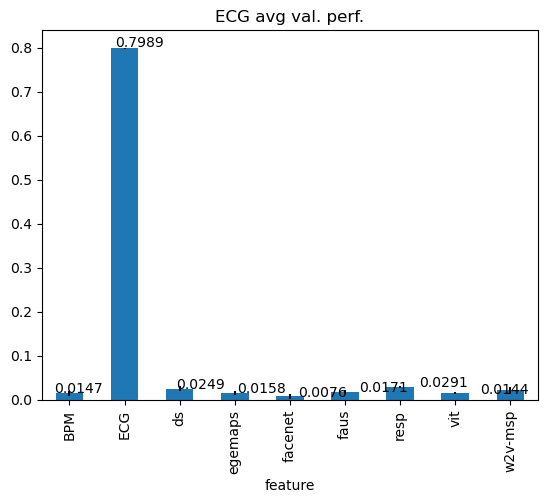

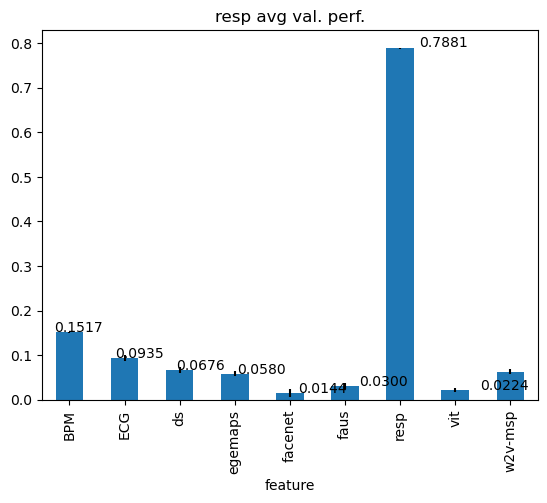

In [18]:
task = 'personalisation'
df_c3 = df.loc[df['task'] == task]
# output: set(df_c3.output.values.tolist())
for output in ['physio-arousal', 'valence', 'BPM', 'ECG', 'resp']:
    df_task = df_c3.loc[df['output']==output][['Value', 'feature']]
    df_perf = df_task.groupby("feature").agg([np.mean, np.std])
    performance = df_perf['Value']
    ax = performance.plot(kind = "bar", y = "mean", legend = False,
                title = f"{output} avg val. perf.", yerr = "std")
    for p in ax.patches:
        ax.annotate(str(f'{p.get_height():.4f}'), (p.get_x() * 1.105, p.get_height() * 1.005))

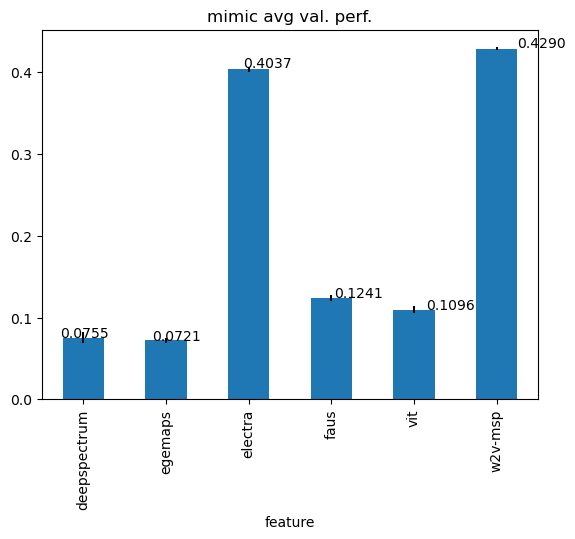

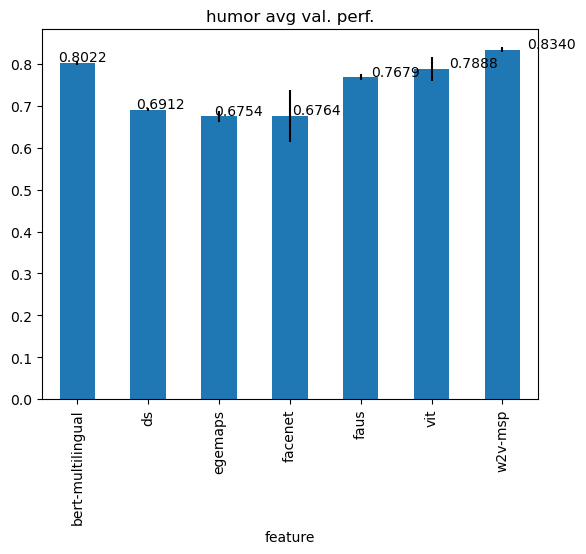

In [17]:
for task in ['mimic', 'humor']: 
    df_task = df.loc[df['task'] == task][['Value', 'feature']]
    df_perf = df_task.groupby("feature").agg([np.mean, np.std])
    performance = df_perf['Value']
    ax = performance.plot(kind = "bar", y = "mean", legend = False,
                title = f"{task} avg val. perf.", yerr = "std")
    for p in ax.patches:
        ax.annotate(str(f'{p.get_height():.4f}'), (p.get_x() * 1.105, p.get_height() * 1.005))

### C1 Mimic

In [3]:
data_dir = '/teamwork/t40511/muse_2023/c1_muse_mimic/' 
segment_id = 1
# a. deepspectrum electra
# b. egemaps facenet faus vit w2v-msp

### C2 Humor

In [4]:
# a. bert-* wav-msp-* vit-* ds
# b. egemaps facenet faus vit wav-msp 

### C3 Personalisation

In [12]:
data_dir = '/teamwork/t40511/muse_2023/c3_muse_personalisation/'
label_dir = os.path.join(data_dir, 'label_segments') 
segment_id = 1
physio_measures = os.listdir( os.path.join(data_dir, 'feature_segments'))
print(physio_measures)
# a. bert-4  biosignals  BPM  BPM_raw  ECG  ECG_raw   resp  resp_raw ds
# b. egemaps  facenet  faus vit  w2v-msp

['resp_raw', 'faus', 'BPM', 'biosignals', 'facenet', 'egemaps', 'ECG_raw', 'bert-4', 'vit', 'ds', 'w2v-msp', 'ECG', 'resp', 'BPM_raw']


### Correlation

In [22]:
fname = os.path.join(data_dir, 'label_segments', 'valence', '1.csv') 
df_valence = pd.read_csv(fname)
fname = os.path.join(data_dir, 'label_segments', 'physio-arousal', '1.csv') 
df_arousal = pd.read_csv(fname)
_measure = 'biosignals'  # includes: 'resp' 'ECG' 'BPM' _raw
fname = os.path.join(data_dir, 'feature_segments', _measure, '1.csv' )
df_bio = pd.read_csv(fname)
_measure = 'bert-4' # 'bert-4' 'ds' 'egemaps'  'facenet'  'faus' 'vit'  'w2v-msp'
fname = os.path.join(data_dir, 'feature_segments', _measure, '1.csv' )
df_bert = pd.read_csv(fname)

In [25]:
df_bert.shape

(598, 770)

In [33]:
df_bio[['ECG', 'BPM', 'resp']].corrwith(df_arousal.value, axis='rows')

ECG     0.001966
BPM    -0.185295
resp    0.035193
dtype: float64

In [34]:
df_bio[['ECG', 'BPM', 'resp']].corrwith(df_valence.value, axis='rows')

ECG     0.022710
BPM     0.154697
resp   -0.007346
dtype: float64

#### Annotations

(598, 3)
Index(['timestamp', 'subject_id', 'value'], dtype='object')
(598, 3)
Index(['timestamp', 'subject_id', 'value'], dtype='object')


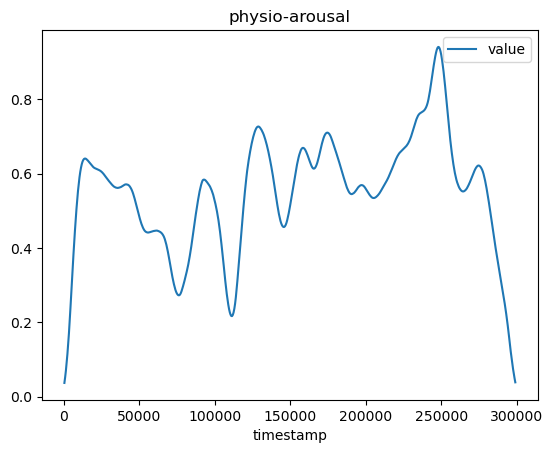

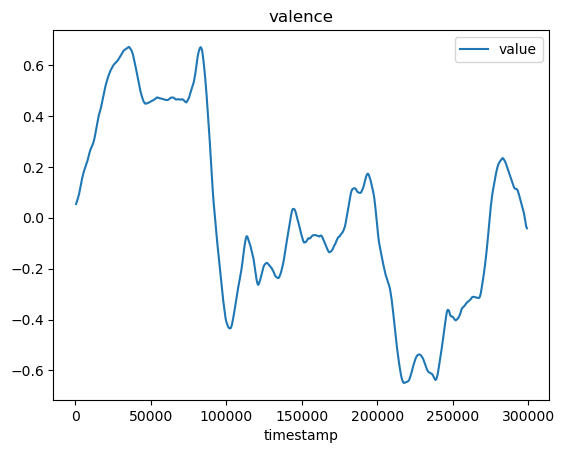

In [11]:
for _label in ['physio-arousal', 'valence']:
    fname = os.path.join(data_dir, 'label_segments', _label, '1.csv')
    os.path.exists(fname)
    df = pd.read_csv(fname)
    print(df.shape)
    print(df.columns)
    df.plot(x = 'timestamp', y = 'value', title=_label)

#### Biosignals

Index(['timestamp', 'subject_id', 'ECG', 'resp', 'BPM'], dtype='object')
(598, 5)


<Axes: xlabel='timestamp'>

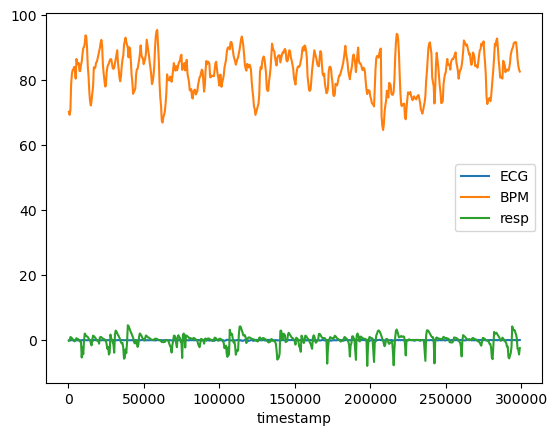

In [8]:
_measure = 'biosignals'  # includes: 'resp' 'ECG' 'BPM' _raw
fname = os.path.join(data_dir, 'feature_segments', _measure, '1.csv' )
os.path.exists(fname)
df = pd.read_csv(fname)
print(df.columns)
print(df.shape)
df.plot(x = 'timestamp', y=['ECG', 'BPM', 'resp'])
# df.plot(x = 'timestamp', y=['ECG'])

#### Audio features

Index(['timestamp', 'subject_id', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc

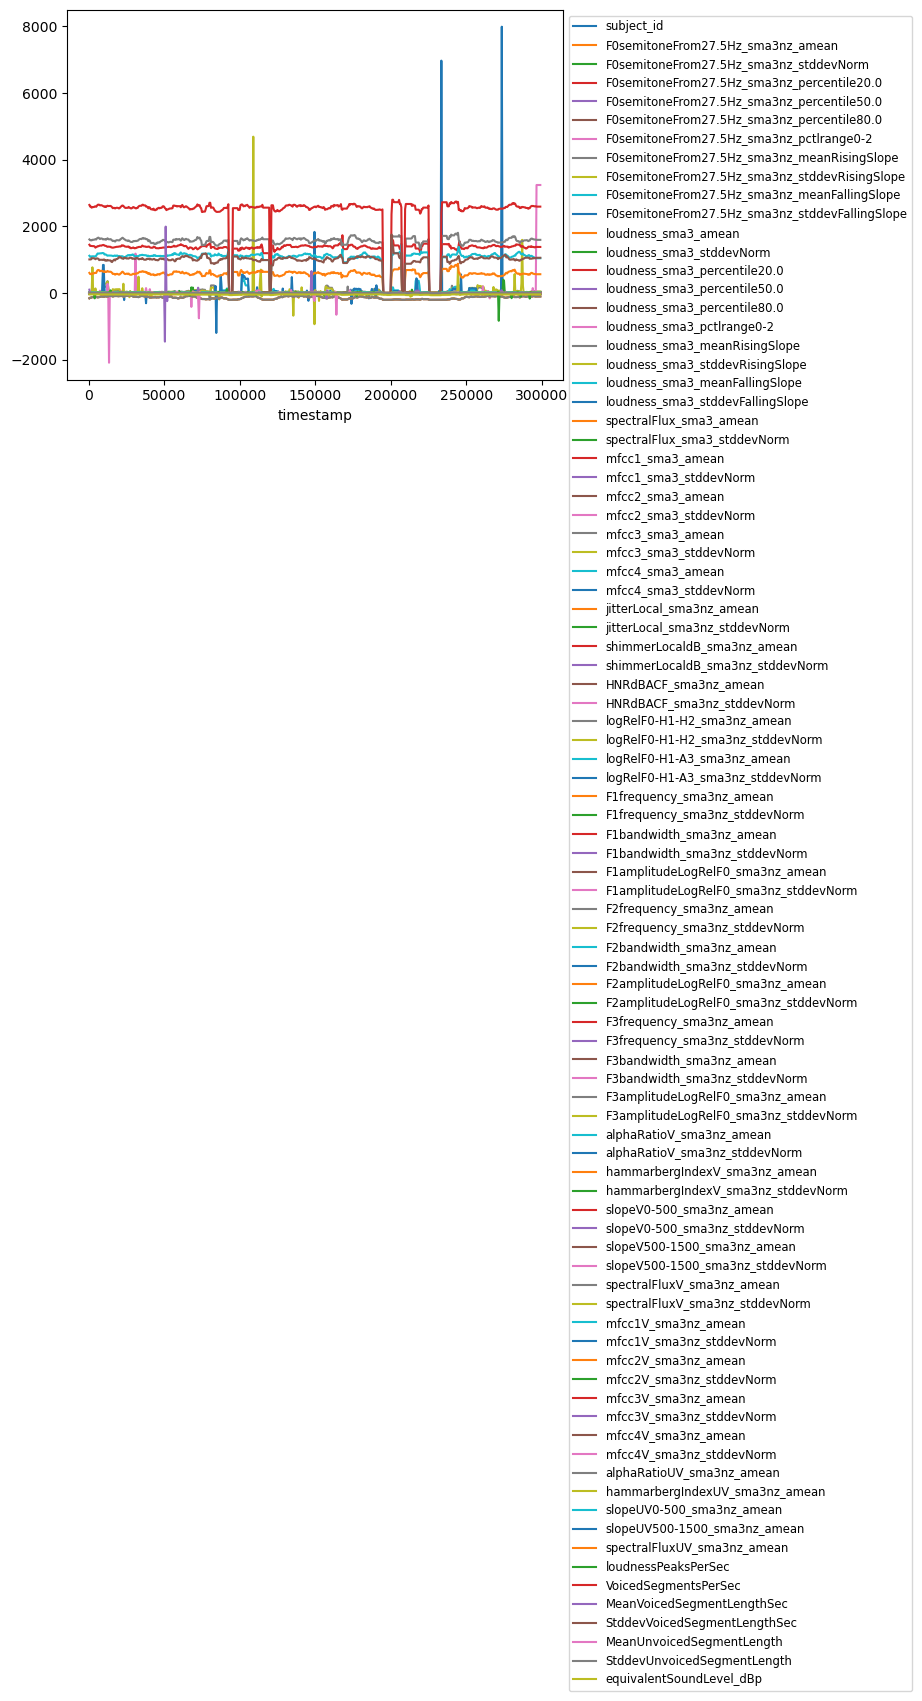

In [9]:
# egemaps
_measure = 'egemaps'  # 
fname = os.path.join(data_dir, 'feature_segments', _measure, '1.csv' )
os.path.exists(fname)
df = pd.read_csv(fname)
print(df.columns)
df.plot(x = 'timestamp').legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)